<a href="https://colab.research.google.com/github/ravij25/weather-prediction-new/blob/main/final_prediction_1_weatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Read the weather data into a DataFrame
url = "https://raw.githubusercontent.com/ravij25/weather-prediction-new/main/Chennai_1990_2022_Madras.csv"
df = pd.read_csv(url)


In [17]:
df.shape

(11894, 5)

In [19]:
df=df.sort_values(by="time")

In [20]:
df

,time,tavg,tmin,tmax,prcp
0,1990-01-01,25.2,22.8,28.4,0.5
1,1990-01-02,24.9,21.7,29.1,0.0
2,1990-01-03,25.6,21.4,29.8,0.0
3,1990-01-04,25.7,NaN,28.7,0.0
4,1990-01-05,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11889,2022-07-21,28.4,24.5,32.8,21.1
11890,2022-07-22,27.8,24.6,32.2,22.1
11891,2022-07-23,27.4,24.7,32.6,18.6
11892,2022-07-24,27.8,25.0,33.3,9.1


In [32]:
df=df[10000:]

In [31]:
df.corr

<bound method DataFrame.corr of             time  tavg  tmin  tmax  prcp
0     1990-01-01  25.2  22.8  28.4   0.5
1     1990-01-02  24.9  21.7  29.1   0.0
2     1990-01-03  25.6  21.4  29.8   0.0
3     1990-01-04  25.7   NaN  28.7   0.0
4     1990-01-05  25.5  20.7  28.4   0.0
...          ...   ...   ...   ...   ...
11889 2022-07-21  28.4  24.5  32.8  21.1
11890 2022-07-22  27.8  24.6  32.2  22.1
11891 2022-07-23  27.4  24.7  32.6  18.6
11892 2022-07-24  27.8  25.0  33.3   9.1
11893 2022-07-25  28.1  25.4  32.6   2.9

[11894 rows x 5 columns]>

In [33]:
# Convert the date column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

# Prepare the data for LSTM training
data = df[['tavg']]


<ipython-input-33-b5ee8d2e59b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')


In [34]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values)

n_steps = 30

X = []
y = []
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps: i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=20))
model.add(Dense(units=y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=16)




Epoch 1/50
94/94 [==============================] - 8s 26ms/step - loss: 0.0410
Epoch 2/50
94/94 [==============================] - 3s 27ms/step - loss: 0.0083
Epoch 3/50
94/94 [==============================] - 3s 28ms/step - loss: 0.0079
Epoch 4/50
94/94 [==============================] - 3s 34ms/step - loss: 0.0076
Epoch 5/50
94/94 [==============================] - 2s 25ms/step - loss: 0.0079
Epoch 6/50
94/94 [==============================] - 2s 26ms/step - loss: 0.0074
Epoch 7/50
94/94 [==============================] - 2s 25ms/step - loss: 0.0071
Epoch 8/50
94/94 [==============================] - 3s 28ms/step - loss: 0.0075
Epoch 9/50
94/94 [==============================] - 3s 33ms/step - loss: 0.0071
Epoch 10/50
94/94 [==============================] - 2s 26ms/step - loss: 0.0068
Epoch 11/50
94/94 [==============================] - 2s 26ms/step - loss: 0.0065
Epoch 12/50
94/94 [==============================] - 2s 26ms/step - loss: 0.0068
Epoch 13/50
94/94 [==================

In [45]:
# Generate weather predictions for the next 90 days
last_data = scaled_data[-n_steps:]

predicted_values = []

for _ in range(500):
    reshaped_data = last_data.reshape(1, n_steps, last_data.shape[1])
    prediction = model.predict(reshaped_data)
    predicted_values.append(prediction[0])
    last_data = np.append(last_data[1:], prediction, axis=0)

predicted_values = scaler.inverse_transform(predicted_values)

1/1 [==============================] - 0s 26ms/step


In [46]:

prediction_dates = pd.date_range(start=df['time'].iloc[-1] + pd.DateOffset(1), periods=500)
predictions_df = pd.DataFrame(predicted_values, columns=['tavg'], index=prediction_dates)

print(predictions_df)

                 tavg
2022-07-26  28.116790
2022-07-27  28.124102
2022-07-28  28.122000
2022-07-29  28.101096
2022-07-30  28.066634
...               ...
2023-12-03  22.299577
2023-12-04  22.299553
2023-12-05  22.299528
2023-12-06  22.299504
2023-12-07  22.299480

[500 rows x 1 columns]


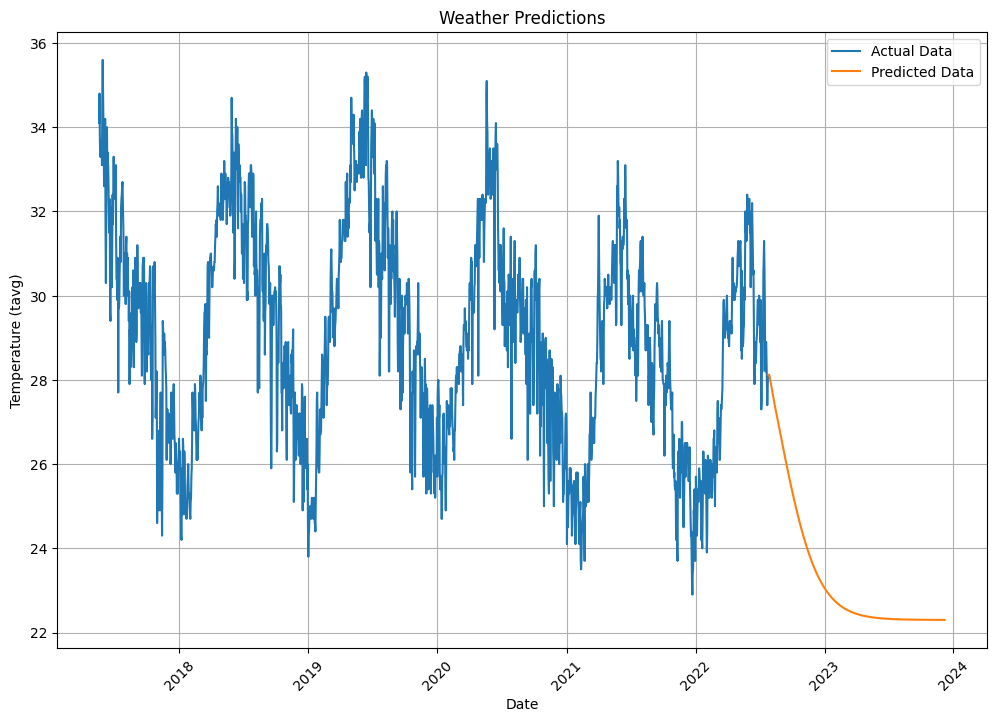

In [47]:
# Plot the weather predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(df['time'], data['tavg'], label='Actual Data')
plt.plot(predictions_df.index, predictions_df['tavg'], label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Temperature (tavg)')
plt.title('Weather Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

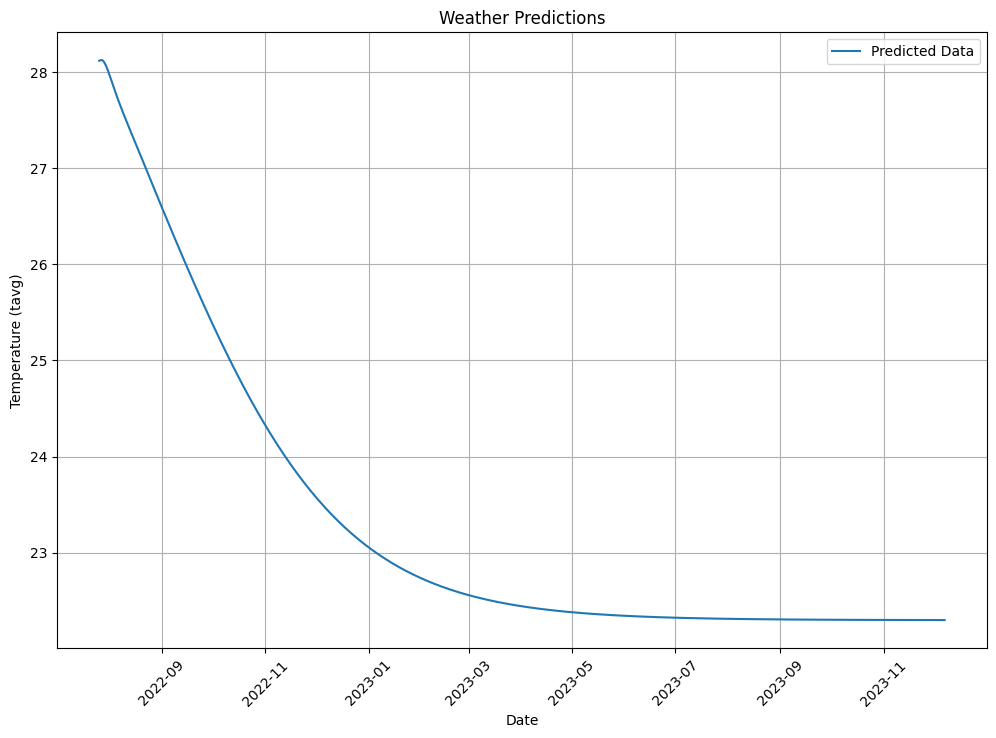

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(predictions_df.index, predictions_df['tavg'], label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Temperature (tavg)')
plt.title('Weather Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()